[[81.86890756]
 [69.08571429]
 [83.46722689]
 [71.86890756]
 [75.69579832]]


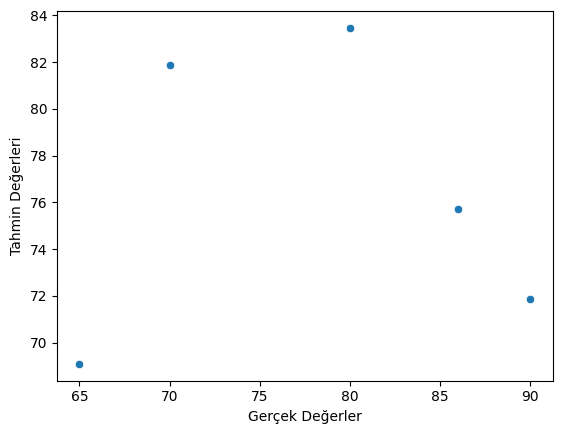

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Upload
datas = pd.read_csv(r"C:\Users\Elanu\Desktop\bilkav.com_odev_tenis.csv")

# Converting categorical data with One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# how to convert 'outlook' column with One-Hot Encoding
outlook_onehot_encoder = OneHotEncoder()
outlook_onehot_encoded = outlook_onehot_encoder.fit_transform(datas[['outlook']]).toarray()

# How to convert One-Hot Encoded data to pandas DATAFRAME
outlook_onehot_encoded_df = pd.DataFrame(outlook_onehot_encoded, columns=outlook_onehot_encoder.categories_[0].tolist())

# Deleting the 'outlook' column in the dataset
datas.drop(['outlook'], axis=1, inplace=True)

# Adding One-Hot Encoded data to a dataset
datas = pd.concat([datas, outlook_onehot_encoded_df], axis=1)

# Converting categorical data with One-Hot Encoding
combined_columns = pd.concat([datas['windy'], datas['play']], axis=1)

onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(combined_columns).toarray()

# How to convert One-Hot Encoded data to pandas DATAFRAME
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=['windy_False', 'windy_True', 'play_no', 'play_yes'])

# Deleting the 'windy' and 'play' columns in the dataset
datas.drop(['windy', 'play'], axis=1, inplace=True)

# Adding One-Hot Encoded data to a dataset
datas = pd.concat([veriler, onehot_encoded_df], axis=1)

# Division of data for training and testing
from sklearn.model_selection import train_test_split

outlook = datas[outlook_onehot_encoder.categories_[0].tolist()]  # We select the outlook column using the column names
temperature = datas[['temperature']]
humidity = datas[['humidity']]

x_train, x_test, y_train, y_test = train_test_split(pd.concat([outlook, temperature], axis=1), humidity, test_size=0.33, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print(y_pred)

# Concating the Datas
df = pd.DataFrame({'Real Values': y_test['humidity'].values.flatten(), 'Predict Values': y_pred.flatten()})

# Drawing a scatter graphic
sns.scatterplot(data=df, x='Real Values', y='Predict Values')

# Show the graphic
plt.show()